# Top

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime
import yfinance as yf

# Custom
import finance_utils as fu
import ystockquote as ysq
import technical_indicators as ti
import stock_db_mgr as sdm

In [3]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

In [4]:
# Set seaborn plot theme:
sns.set_theme()

## Versions

In [6]:
sys.version

'3.6.9 (default, Dec  8 2021, 21:08:43) \n[GCC 8.4.0]'

In [7]:
sys.version_info

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

In [8]:
np.__version__

'1.19.5'

In [9]:
pd.__version__

'1.1.5'

In [10]:
sns.__version__

'0.11.2'

# Technical Indicator Tests

## Utility math function

In [11]:
# stop is excluded
t = np.arange(-5, 6, 1)
t

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [12]:
s = ti.step(t)
s

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [13]:
r = ti.ramp(t)
r

array([-0., -0., -0., -0., -0.,  0.,  1.,  2.,  3.,  4.,  5.])

<StemContainer object of 3 artists>

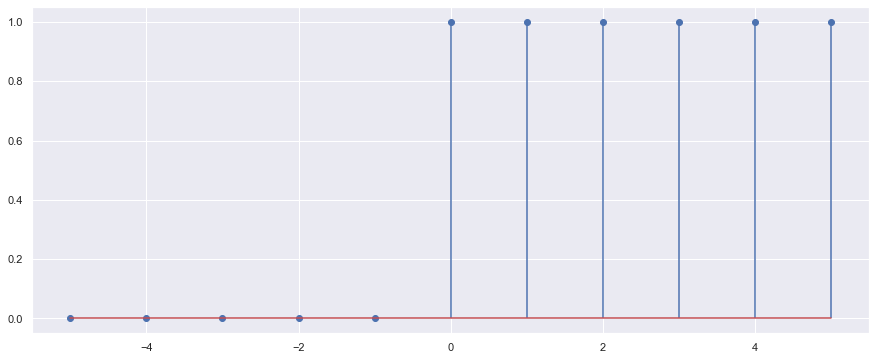

In [14]:
plt.stem(t, s)

<StemContainer object of 3 artists>

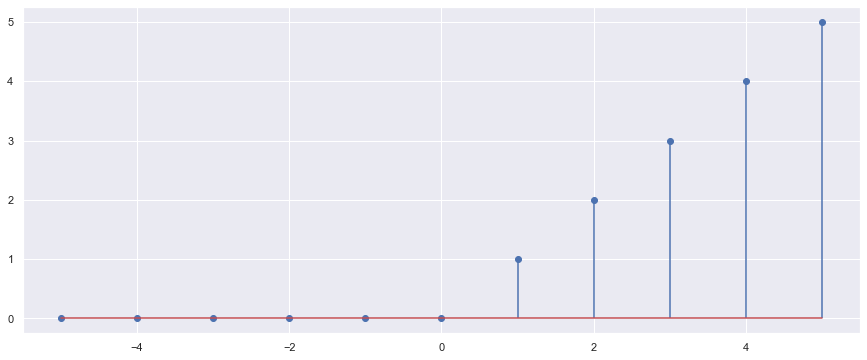

In [15]:
plt.stem(t, r)

## Crossing detection

In [48]:
x1 = np.array([1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0]) + 1
x2 = np.ones(len(x1)) * 2
x = np.arange(len(x1))

In [49]:
o = ti.cross_over(x1, x2)
o

array([False, False,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False])

In [50]:
u = ti.cross_under(x1, x2)
u

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False])

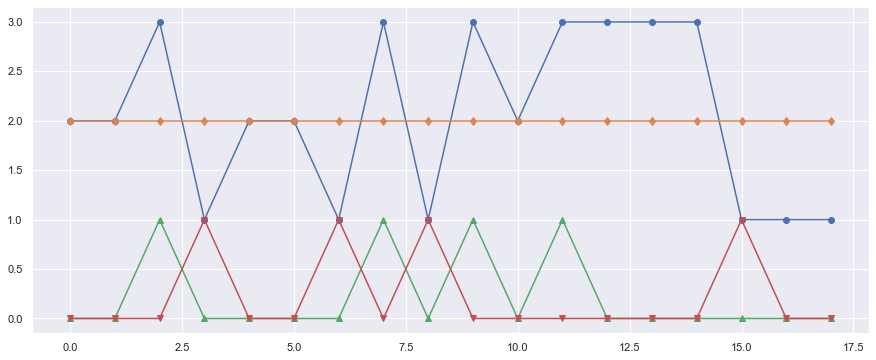

In [52]:
#plt.plot(x, o)
plt.plot(x, x1, marker='o')
plt.plot(x, x2, marker='d')
plt.plot(x, o * 1, marker='^')
plt.plot(x, u * 1, marker='v')

In [20]:
t = np.linspace(0, 4 * np.pi, 50)
s = np.sin(t)
c = np.cos(t * 1.7)
o = ti.cross_over(s, c)
u = ti.cross_under(s, c)

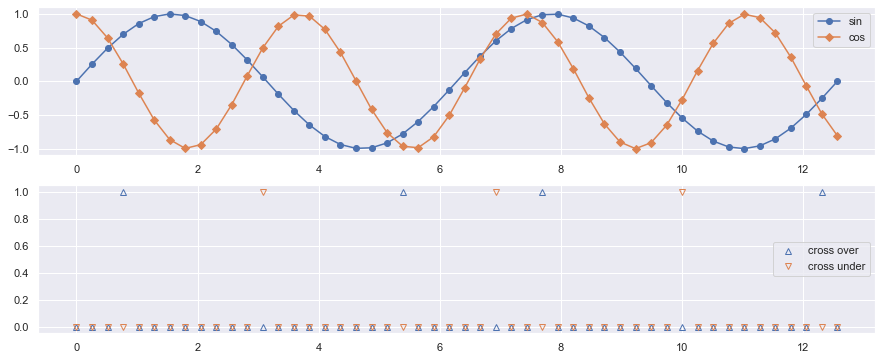

In [21]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(t, s, marker='o', label='sin')
ax.plot(t, c, marker='D', label='cos')
ax.legend()

ax2 = fig.add_subplot(212)
ax2.plot(t, o, marker='^', markerfacecolor='None', linestyle='None', label='cross over')
ax2.plot(t, u, marker='v', markerfacecolor='None', linestyle='None', label='cross under')
ax2.legend()

# Finance Utils

## Commission

In [22]:
fu.calc_commission(34)

5.069

In [23]:
fu.calc_commission_etf(34)

0.11900000000000001

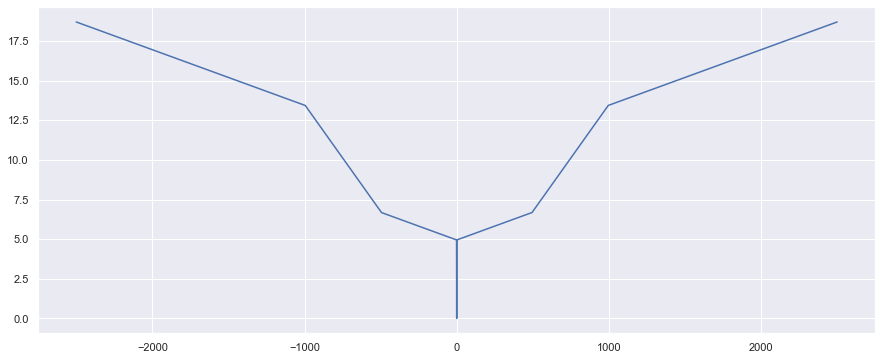

In [24]:
s = np.arange(-2500, 2501)
c = [fu.calc_commission(i) for i in s]
plt.plot(s, c)

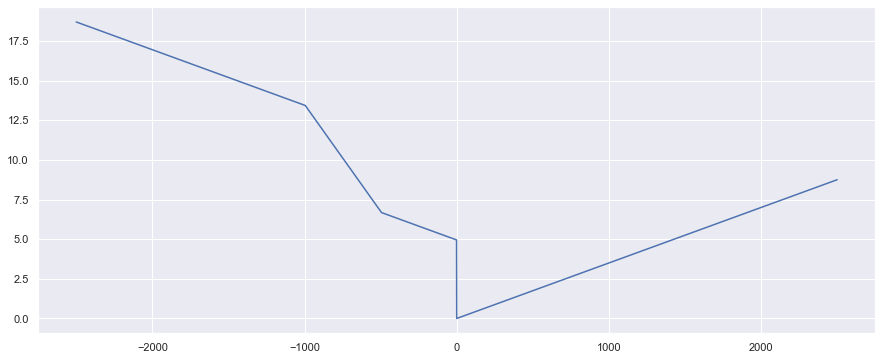

In [25]:
c = [fu.calc_commission_etf(i) for i in s]
plt.plot(s, c)

## Loading

In [26]:
f = 'stock_db/test/SPY.csv'
df = fu.load_data_frame(f, datetime.date(2018, 1, 1), datetime.date(2018, 4, 1), True)

In [27]:
len(df.index[df.index.duplicated()].unique())

0

# Yahoo Test

In [28]:
s = 'XBB.TO'
ysq.get_52_week_high(s)

31.93

In [29]:
ysq.get_52_week_low(s)

26.78

In [30]:
ysq.get_price(s)

26.85

In [31]:
ysq.get_dividend_yield('ZCN.TO')

3.15

## Yield Tests

In [32]:
def print_yield(s):
    t = yf.Ticker(s)
    idx = [k for k in t.info.keys() if re.search('yield', k, re.I)]
    df = pd.DataFrame(
        index=idx,
        data=[t.info[k] for k in idx],
        columns=['Value']
    )
    df.rename_axis('Parameter', axis='index', inplace=True)
    return df

In [34]:
print_yield('IBM')

,Value
Parameter,
yield,NaN
trailingAnnualDividendYield,0.055881
fiveYearAvgDividendYield,4.780000
dividendYield,0.056100


In [37]:
for s in ['XBB.TO', 'VUN.TO', 'ZCN.TO', 'BMO.TO', 'SPY', 'XOM', 'TSLA']:
    print('s =', s)
    print(print_yield(s))

s = XBB.TO
                                Value
Parameter                            
yield                        0.028700
trailingAnnualDividendYield  0.031667
fiveYearAvgDividendYield          NaN
dividendYield                     NaN
s = VUN.TO
                              Value
Parameter                          
yield                        0.0111
trailingAnnualDividendYield     NaN
fiveYearAvgDividendYield        NaN
dividendYield                   NaN
s = ZCN.TO
                              Value
Parameter                          
yield                        0.0315
trailingAnnualDividendYield     NaN
fiveYearAvgDividendYield        NaN
dividendYield                   NaN
s = BMO.TO
                                Value
Parameter                            
yield                             NaN
trailingAnnualDividendYield  0.043323
fiveYearAvgDividendYield     4.010000
dividendYield                0.047100
s = SPY
                                Value
Parameter             

## Price Tests

In [38]:
def print_price(s):
    t = yf.Ticker(s)
    idx = [k for k in t.info.keys() if re.search('price', k, re.I)]
    df = pd.DataFrame(
        index=idx,
        data=[t.info[k] for k in idx],
        columns=['Value']
    )
    df.rename_axis('Parameter', axis='index', inplace=True)
    return df

In [39]:
print_price('IBM')

,Value
Parameter,
targetLowPrice,112.000000
targetMedianPrice,140.500000
currentPrice,117.800000
targetMeanPrice,141.560000
targetHighPrice,163.000000
priceToBook,5.481619
priceHint,2.000000
priceToSalesTrailing12Months,1.769211
navPrice,NaN


## Stock Historical Download

In [40]:
df = yf.download('AAPL','2016-01-01','2019-08-01', progress=False)

In [41]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151495,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085487,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111166,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228090,283192000


In [42]:
df = yf.download(['AAPL', 'SPY'],'2016-01-01','2019-08-01', progress=False)

In [43]:
df.head()

Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2016-01-04  24.151497  178.051285  26.337500  201.020004  26.342501   
2016-01-05  23.546276  178.352432  25.677500  201.360001  26.462500   
2016-01-06  23.085482  176.102661  25.174999  198.820007  25.592501   
2016-01-07  22.111172  171.877670  24.112499  194.050003  25.032499   
2016-01-08  22.228088  169.991013  24.240000  191.919998  24.777500   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2016-01-04  201.029999  25.500000  198.589996  25.652500  200.490005   
2016-01-05  201.899994  25.602501  200.050003  26.437500  201.399994   
2016-01-06  200.059998  24.967501  197.600006  25.139999  198.339996   
2016-01-07  197.440002  24.107500  193.589996  24.670000  195.330002   
2016-01-08  195.850006  24.190001  191.580002  24.637501  195.190002   

               Volume             
                 AAPL        SPY  
Date                              
2016-01-04  270597600  222353500  
2016-01-05  223164000  110845800  
2016-01-06  273829600  152112600  
2016-01-07  324377600  213436100  
2016-01-08  283192000  209817200

# Stock DB Manager

## Basic

In [21]:
db = sdm.StockDBMgr('stock_db/qt')

In [22]:
symbols = db.get_all_symbols()

In [23]:
[s for s in symbols if not db.validate_symbol_data(s)]

[]

In [24]:
# Enable when required...
#db.update_all_symbols()

In [25]:
s = symbols[0]
s

'VUN.TO'

In [26]:
df = db.get_symbol_data(s)
df.head()

VUN.TO,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.673937,21.673937,21.656282,21.673937,7300.0
2013-08-13,21.815185,21.824013,21.762214,21.824013,2100.0
2013-08-14,21.779878,21.779878,21.673935,21.691593,6300.0
2013-08-15,21.541503,21.541503,21.311962,21.311962,8400.0
2013-08-16,21.364935,21.426733,21.285478,21.311962,5400.0


In [27]:
df.tail()

VUN.TO,Open,High,Low,Close,Volume
Date,,,,,
2022-10-03,67.610001,68.510002,67.199997,68.169998,31700.0
2022-10-04,69.360001,70.180000,69.339996,69.809998,39300.0
2022-10-05,69.699997,70.419998,69.410004,70.059998,58600.0
2022-10-06,70.279999,70.760002,70.110001,70.160004,76000.0
2022-10-07,69.160004,69.160004,67.820000,68.239998,42400.0


In [28]:
df.describe()

VUN.TO,Open,High,Low,Close,Volume
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,47.233119,47.430187,46.976990,47.209882,43287.820792
std,16.345065,16.452937,16.204078,16.333168,64114.221056
min,21.294309,21.311964,21.188366,21.188366,0.000000
25%,33.856425,33.938851,33.709902,33.825623,17100.000000
50%,44.968905,45.317866,44.703903,44.968899,29300.000000
75%,58.088995,58.360095,57.841589,58.099262,47850.000000
max,83.923034,84.061896,83.372444,83.679031,883300.000000


<AxesSubplot:xlabel='Date'>

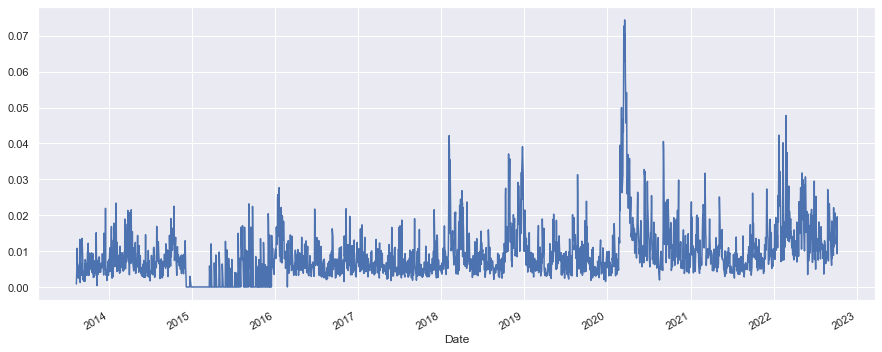

In [29]:
# Computations on Data:
((df['High'] - df['Low']) / df['Close']).plot()

In [30]:
dfa = db.get_all_symbol_single_data_item('Close')
dfa.describe()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
count,2299.000000,5493.000000,2381.000000,2381.000000,3111.000000
mean,47.209882,21.904338,22.488965,25.581447,17.378280
std,16.333168,5.731638,4.216442,4.749266,4.607765
min,21.188366,12.069209,14.560889,15.627402,10.747922
25%,33.825623,16.591499,18.574198,22.100582,13.289530
50%,44.968899,22.666851,22.842388,26.108404,16.493622
75%,58.099262,26.949049,25.283255,28.394039,19.865265
max,83.679031,32.209591,32.759075,35.653393,29.111023


In [54]:
dfa

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,NaN,12.492698,NaN,NaN,NaN
2000-11-24,NaN,12.469163,NaN,NaN,NaN
2000-11-27,NaN,12.469163,NaN,NaN,NaN
2000-11-28,NaN,12.539755,NaN,NaN,NaN
2000-11-29,NaN,12.563276,NaN,NaN,NaN
...,...,...,...,...,...
2022-10-03,68.169998,27.400000,22.879999,27.389999,25.299999
2022-10-04,69.809998,27.450001,23.430000,28.309999,25.959999
2022-10-05,70.059998,27.180000,23.570000,28.129999,25.780001


<AxesSubplot:xlabel='Date'>

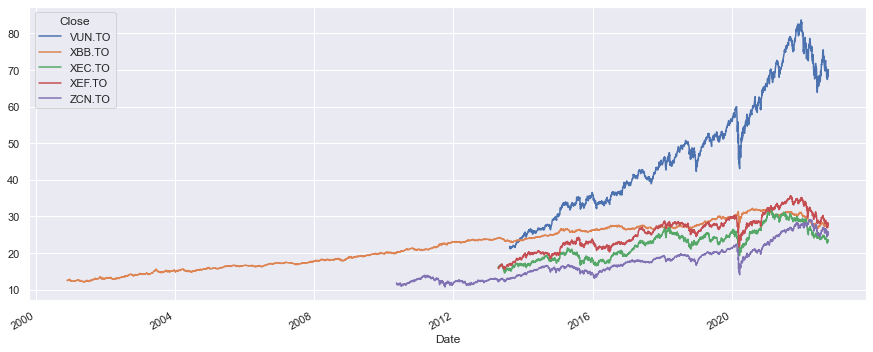

In [55]:
dfa.plot()

## Multi-index

In [31]:
# Indexer utility
idx = pd.IndexSlice

In [34]:
dfm = db.get_all_symbol_dataframe()
dfm.head()

Symbol     VUN.TO                           XBB.TO                        \
Data         Open High Low Close Volume       Open       High        Low   
Date                                                                       
2000-11-23    NaN  NaN NaN   NaN    NaN  12.492698  12.492698  12.492698   
2000-11-24    NaN  NaN NaN   NaN    NaN  12.492689  12.492689  12.445637   
2000-11-27    NaN  NaN NaN   NaN    NaN  12.492689  12.492689  12.469163   
2000-11-28    NaN  NaN NaN   NaN    NaN  12.539755  12.563282  12.469175   
2000-11-29    NaN  NaN NaN   NaN    NaN  12.563276  12.563276  12.539749   

Symbol                          ... XEF.TO                       ZCN.TO       \
Data            Close   Volume  ...   Open High Low Close Volume   Open High   
Date                            ...                                            
2000-11-23  12.492698   4900.0  ...    NaN  NaN NaN   NaN    NaN    NaN  NaN   
2000-11-24  12.469163  21100.0  ...    NaN  NaN NaN   NaN    NaN    NaN  NaN   
2000-11-27  12.469163  17600.0  ...    NaN  NaN NaN   NaN    NaN    NaN  NaN   
2000-11-28  12.539755  33000.0  ...    NaN  NaN NaN   NaN    NaN    NaN  NaN   
2000-11-29  12.563276   3800.0  ...    NaN  NaN NaN   NaN    NaN    NaN  NaN   

Symbol                       
Data       Low Close Volume  
Date                         
2000-11-23 NaN   NaN    NaN  
2000-11-24 NaN   NaN    NaN  
2000-11-27 NaN   NaN    NaN  
2000-11-28 NaN   NaN    NaN  
2000-11-29 NaN   NaN    NaN  

[5 rows x 25 columns]

In [58]:
dfm.describe()

Symbol       VUN.TO                                                        \
Data           Open         High          Low        Close         Volume   
count   2299.000000  2299.000000  2299.000000  2299.000000    2299.000000   
mean      47.233119    47.430187    46.976990    47.209882   43287.820792   
std       16.345065    16.452937    16.204078    16.333168   64114.221056   
min       21.294309    21.311964    21.188366    21.188366       0.000000   
25%       33.856425    33.938851    33.709902    33.825623   17100.000000   
50%       44.968905    45.317866    44.703903    44.968899   29300.000000   
75%       58.088995    58.360095    57.841589    58.099262   47850.000000   
max       83.923034    84.061896    83.372444    83.679031  883300.000000   

Symbol       XBB.TO                                                       ...  \
Data           Open         High          Low        Close        Volume  ...   
count   5493.000000  5493.000000  5493.000000  5493.000000  5.493000e+03  ...   
mean      21.903543    21.936241    21.867345    21.904338  8.654779e+04  ...   
std        5.728298     5.738603     5.725467     5.731638  1.156892e+05  ...   
min       11.857475    12.092732    11.857475    12.069209  0.000000e+00  ...   
25%       16.593749    16.602871    16.563069    16.591499  3.070000e+04  ...   
50%       22.640540    22.686718    22.606960    22.666851  6.360000e+04  ...   
75%       26.950160    26.981000    26.917631    26.949049  1.061000e+05  ...   
max       32.181252    32.209596    32.162353    32.209591  2.950400e+06  ...   

Symbol       XEF.TO                                                        \
Data           Open         High          Low        Close         Volume   
count   2381.000000  2381.000000  2381.000000  2381.000000    2381.000000   
mean      25.587241    25.661353    25.494398    25.581447   48809.491810   
std        4.745571     4.768526     4.725574     4.749266   54040.713587   
min       15.700011    15.708079    15.562859    15.627402       0.000000   
25%       22.112024    22.160869    22.016638    22.100582   18600.000000   
50%       26.126748    26.175350    25.996603    26.108404   35500.000000   
75%       28.410000    28.495518    28.314167    28.394039   60400.000000   
max       35.556406    35.663094    35.478816    35.653393  972300.000000   

Symbol       ZCN.TO                                                       
Data           Open         High          Low        Close        Volume  
count   3111.000000  3111.000000  3111.000000  3111.000000  3.111000e+03  
mean      17.385563    17.445458    17.310106    17.378280  7.446573e+04  
std        4.605400     4.626332     4.583721     4.607765  2.875117e+05  
min       10.849729    10.907905    10.747922    10.747922  0.000000e+00  
25%       13.293526    13.335912    13.252214    13.289530  1.840000e+04  
50%       16.489199    16.536275    16.434294    16.493622  3.850000e+04  
75%       19.851735    19.928415    19.788821    19.865265  7.735000e+04  
max       29.170030    29.288048    29.041621    29.111023  1.430690e+07  

[8 rows x 25 columns]

In [91]:
# Accessing a single stock, all param
dfm.loc[:, idx['XBB.TO', :]].tail()

Symbol         XBB.TO                                           
Data             Open       High        Low      Close    Volume
Date                                                            
2022-10-03  27.520000  27.540001  27.370001  27.400000  330200.0
2022-10-04  27.500000  27.559999  27.410000  27.450001  207400.0
2022-10-05  27.389999  27.389999  27.180000  27.180000  144300.0
2022-10-06  27.190001  27.190001  27.080000  27.139999  205600.0
2022-10-07  27.080000  27.080000  27.000000  27.000000   45600.0

In [92]:
# Accessing multi stocks:
dfm.loc[:, idx[['ZCN.TO', 'XBB.TO'], :]].tail()

Symbol         ZCN.TO                                                XBB.TO  \
Data             Open       High        Low      Close    Volume       Open   
Date                                                                          
2022-10-03  24.959999  25.400000  24.959999  25.299999  125300.0  27.520000   
2022-10-04  25.700001  26.000000  25.700001  25.959999  145400.0  27.500000   
2022-10-05  25.770000  25.860001  25.610001  25.780001  117800.0  27.389999   
2022-10-06  25.709999  25.730000  25.360001  25.450001  168800.0  27.190001   
2022-10-07  25.260000  25.260000  24.840000  24.910000  177700.0  27.080000   

Symbol                                                 
Data             High        Low      Close    Volume  
Date                                                   
2022-10-03  27.540001  27.370001  27.400000  330200.0  
2022-10-04  27.559999  27.410000  27.450001  207400.0  
2022-10-05  27.389999  27.180000  27.180000  144300.0  
2022-10-06  27.190001  27.080000  27.139999  205600.0  
2022-10-07  27.080000  27.000000  27.000000   45600.0

In [93]:
# All stock, single Data:
dfm.loc[:, idx[:, 'Close']].tail()

Symbol,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Data,Close,Close,Close,Close,Close
Date,,,,,
2022-10-03,68.169998,27.400000,22.879999,27.389999,25.299999
2022-10-04,69.809998,27.450001,23.430000,28.309999,25.959999
2022-10-05,70.059998,27.180000,23.570000,28.129999,25.780001
2022-10-06,70.160004,27.139999,23.690001,27.930000,25.450001
2022-10-07,68.239998,27.000000,23.170000,27.490000,24.910000


In [62]:
# Fancy: date, multi stock, multi data
dfm.loc['2014-01-01':, idx[['XBB.TO', 'ZCN.TO'], ['Open', 'Close']]].head()

Symbol         XBB.TO                ZCN.TO           
Data             Open      Close       Open      Close
Date                                                  
2014-01-02  23.440676  23.487667  14.198221  14.151746
2014-01-03  23.432835  23.503321  14.198221  14.159492
2014-01-06  23.495499  23.550322  14.182727  14.089778
2014-01-07  23.534659  23.565987  14.128510  14.213715
2014-01-08  23.542477  23.526815  14.229207  14.236951

In [97]:
dfm.loc[dfm.notna().all(1)].head()

Symbol         VUN.TO                                              XBB.TO  \
Data             Open       High        Low      Close  Volume       Open   
Date                                                                        
2013-08-12  21.673937  21.673937  21.656282  21.673937  7300.0  23.402351   
2013-08-13  21.815185  21.824013  21.762214  21.824013  2100.0  23.240214   
2013-08-14  21.779878  21.779878  21.673935  21.691593  6300.0  23.186159   
2013-08-15  21.541503  21.541503  21.311962  21.311962  8400.0  23.116678   
2013-08-16  21.364935  21.426733  21.285478  21.311962  5400.0  23.101226   

Symbol                                                 ...     XEF.TO  \
Data             High        Low      Close    Volume  ...       Open   
Date                                                   ...              
2013-08-12  23.402351  23.348305  23.356026   58000.0  ...  16.861777   
2013-08-13  23.247936  23.193889  23.247936   85000.0  ...  16.942460   
2013-08-14  23.217042  23.186159  23.193880   75800.0  ...  17.087682   
2013-08-15  23.147561  23.093514  23.124399  148900.0  ...  16.877914   
2013-08-16  23.116669  23.024016  23.054901  186800.0  ...  16.990862   

Symbol                                                  ZCN.TO             \
Data             High        Low      Close  Volume       Open       High   
Date                                                                        
2013-08-12  16.902117  16.861777  16.885981  2000.0  12.953867  12.992035   
2013-08-13  17.079613  16.942460  17.079613  1600.0  13.014933  13.060735   
2013-08-14  17.087682  17.039276  17.055410  3200.0  13.037833  13.075999   
2013-08-15  16.885982  16.861778  16.861778  2000.0  13.007304  13.106537   
2013-08-16  16.998931  16.950524  16.966660  2800.0  13.121805  13.190506   

Symbol                                     
Data              Low      Close   Volume  
Date                                       
2013-08-12  12.946234  12.992035  28900.0  
2013-08-13  13.014933  13.037834  48000.0  
2013-08-14  13.022565  13.045466  65800.0  
2013-08-15  12.976770  13.098904  10500.0  
2013-08-16  13.121805  13.190506  25200.0  

[5 rows x 25 columns]

<AxesSubplot:xlabel='Date'>

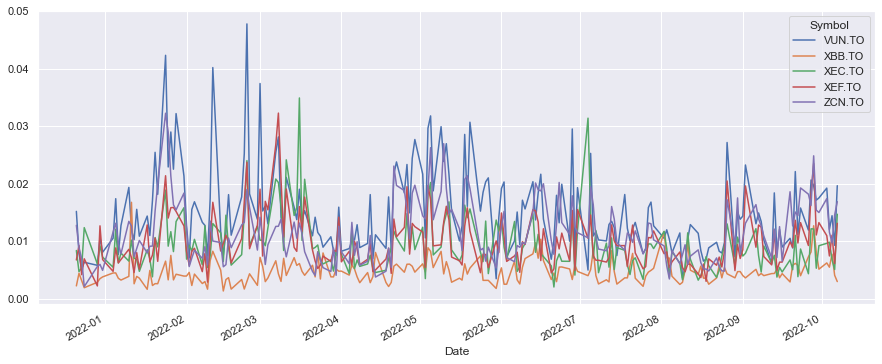

In [105]:
# Using xs because it auto remove the index level not required

((dfm.xs('High', axis='columns', level='Data') - dfm.xs('Low', axis='columns', level='Data')) / dfm.xs('Close', axis='columns', level='Data')).iloc[-200:].plot()
#dfm.loc[:, idx[:, 'Open']] > dfm.loc[:, idx[:, 'Close']]
#db.get_all_symbol_single_data_item('Close')
#(db.get_all_symbol_single_data_item('Close') > db.get_all_symbol_single_data_item('Open')).mul(1).describe()

## N/A Testing

In [63]:
dfa.isna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,True,False,True,True,True
2000-11-24,True,False,True,True,True
2000-11-27,True,False,True,True,True
2000-11-28,True,False,True,True,True
2000-11-29,True,False,True,True,True
...,...,...,...,...,...
2022-10-03,False,False,False,False,False
2022-10-04,False,False,False,False,False
2022-10-05,False,False,False,False,False


In [85]:
# Logical NOT
~(dfa.isna())
# ... can also use .notna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-10-03,True,True,True,True,True
2022-10-04,True,True,True,True,True
2022-10-05,True,True,True,True,True


In [86]:
# .mul(1) to convert bool to 0-1
# This is equivalent to * 1 (multiply by 1)
dfa.notna().mul(1)

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,0,1,0,0,0
2000-11-24,0,1,0,0,0
2000-11-27,0,1,0,0,0
2000-11-28,0,1,0,0,0
2000-11-29,0,1,0,0,0
...,...,...,...,...,...
2022-10-03,1,1,1,1,1
2022-10-04,1,1,1,1,1
2022-10-05,1,1,1,1,1


In [88]:
dfa.notna().all()

Close
VUN.TO    False
XBB.TO     True
XEC.TO    False
XEF.TO    False
ZCN.TO    False
dtype: bool

In [89]:
dfa.notna().all(1) # Equivalent: axis='columns'

Date
2000-11-23    False
2000-11-24    False
2000-11-27    False
2000-11-28    False
2000-11-29    False
              ...  
2022-10-03     True
2022-10-04     True
2022-10-05     True
2022-10-06     True
2022-10-07     True
Length: 5493, dtype: bool

<AxesSubplot:xlabel='Date'>

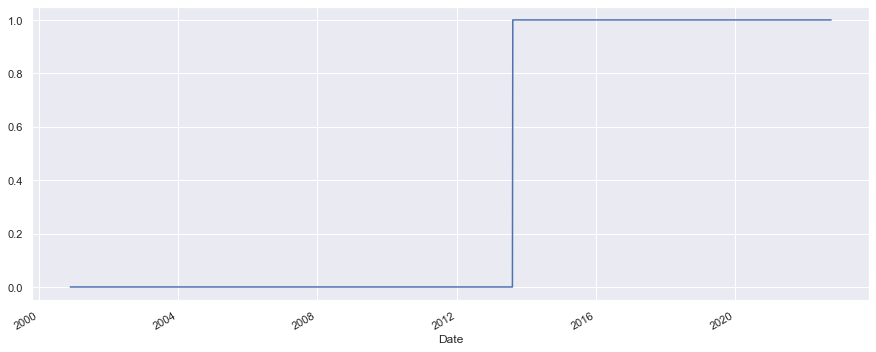

In [91]:
dfa.notna().all(1).mul(1).plot()

In [92]:
# Date when first all data available
dfa[(dfa.notna().all(1))].iloc[0].name

Timestamp('2013-08-12 00:00:00')

In [77]:
# Make sure once valid, all valid:
dfa.notna().all(1).diff().sum()

1

In [71]:
# Could be drastic?
df.dropna(axis=1, how='any', inplace=False)

VUN.TO,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.673937,21.673937,21.656282,21.673937,7300.0
2013-08-13,21.815185,21.824013,21.762214,21.824013,2100.0
2013-08-14,21.779878,21.779878,21.673935,21.691593,6300.0
2013-08-15,21.541503,21.541503,21.311962,21.311962,8400.0
2013-08-16,21.364935,21.426733,21.285478,21.311962,5400.0
...,...,...,...,...,...
2022-10-03,67.610001,68.510002,67.199997,68.169998,31700.0
2022-10-04,69.360001,70.180000,69.339996,69.809998,39300.0
2022-10-05,69.699997,70.419998,69.410004,70.059998,58600.0


<AxesSubplot:xlabel='Date'>

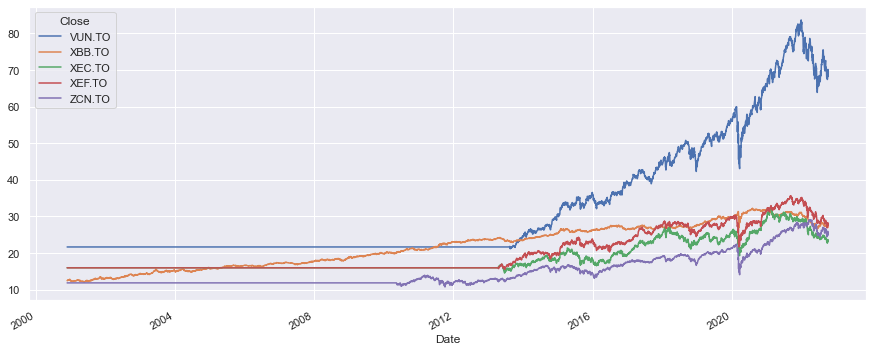

In [72]:
fu.fill_nan_data(dfa).plot()

<AxesSubplot:xlabel='Date'>

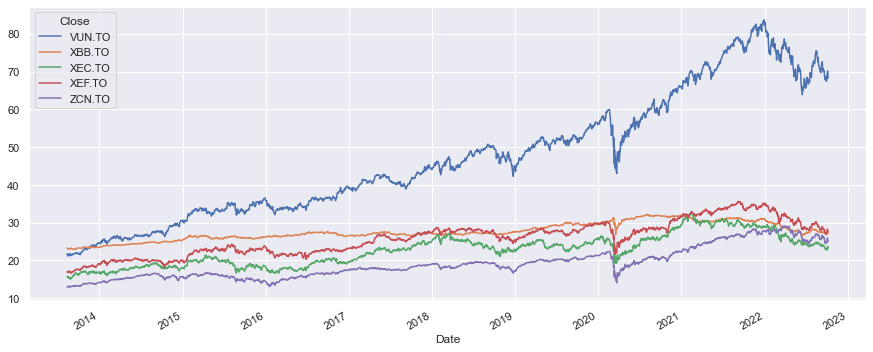

In [93]:
# Plot when data start to be valid for all stocks
dfa[(dfa.notna().all(1))].plot()

<AxesSubplot:xlabel='Date'>

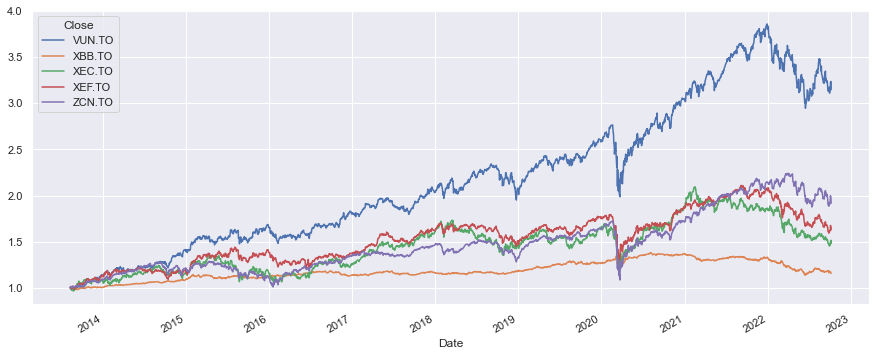

In [94]:
# Plot normalized data from valid
dfn = fu.normalize_data_frame(dfa[(dfa.notna().all(1))])
dfn.plot()

In [95]:
dfn.describe()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2.178187,1.184747,1.453256,1.534407,1.473646
std,0.753586,0.098119,0.262167,0.266301,0.313690
min,0.977597,0.980945,0.965879,0.986144,1.000000
25%,1.560659,1.128795,1.213483,1.328255,1.232176
50%,2.074791,1.165047,1.472883,1.560293,1.401053
75%,2.680605,1.269596,1.622028,1.685088,1.606570
max,3.860814,1.379070,2.095089,2.111420,2.240682


# Stock Comparision
... with normalized data (of course)

<AxesSubplot:xlabel='Date'>

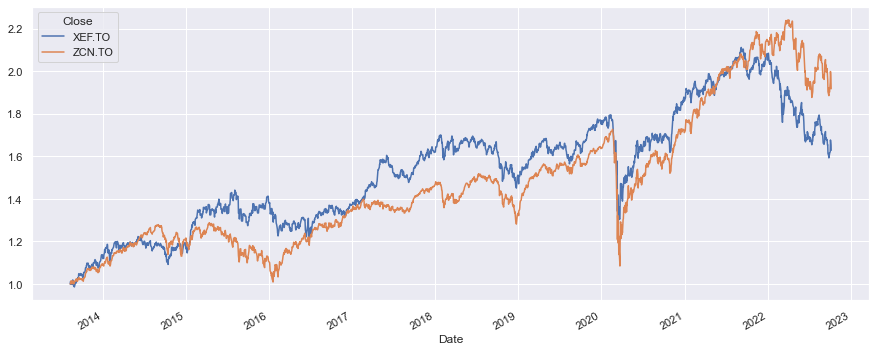

In [76]:
dfn[['XEF.TO', 'ZCN.TO']].plot()

<AxesSubplot:xlabel='Date'>

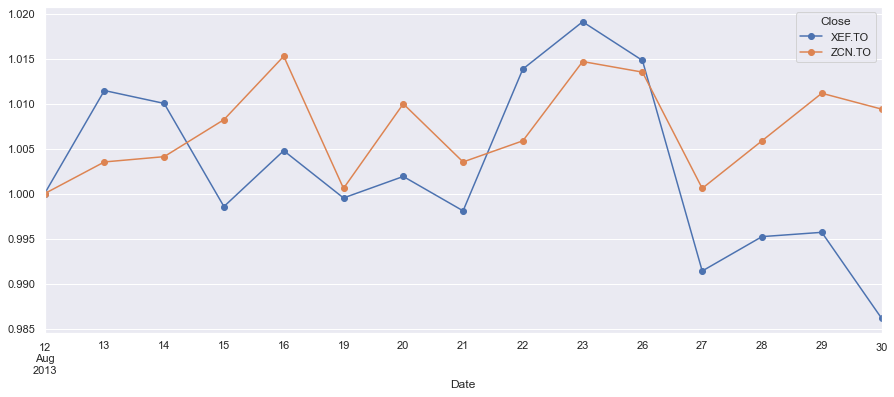

In [77]:
dfn[['XEF.TO', 'ZCN.TO']][0:15].plot(marker='o')

<AxesSubplot:xlabel='Date'>

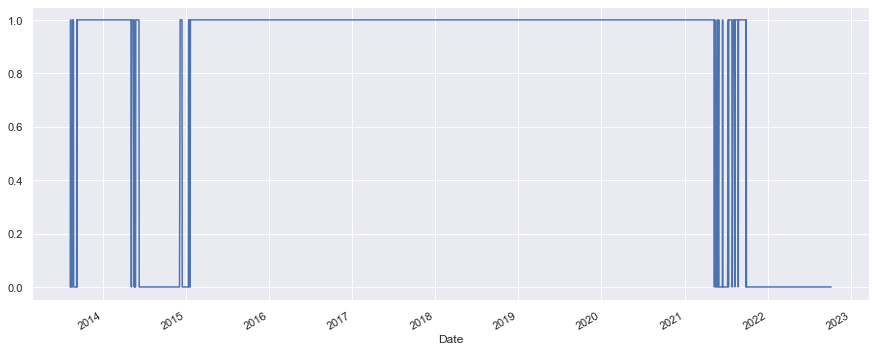

In [78]:
((dfn['XEF.TO'] > dfn['ZCN.TO']) * 1).plot()

<AxesSubplot:xlabel='Date'>

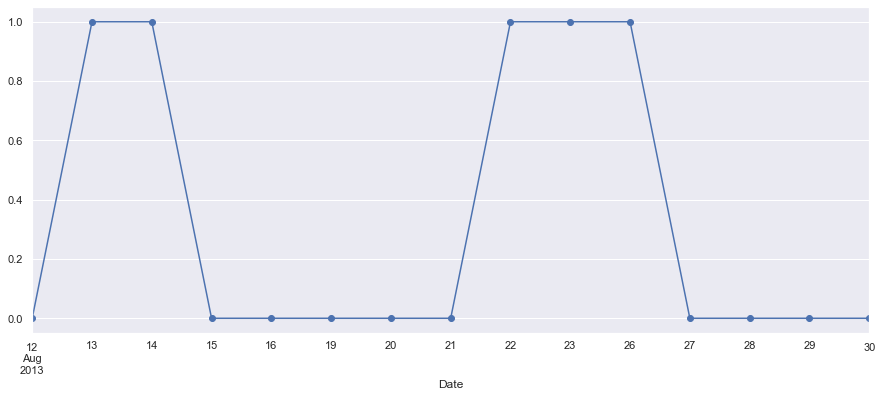

In [79]:
((dfn['XEF.TO'] > dfn['ZCN.TO']) * 1)[0:15].plot(marker='o')

In [80]:
x1 = dfn['XEF.TO']
x2 = dfn['ZCN.TO']

<AxesSubplot:xlabel='Date'>

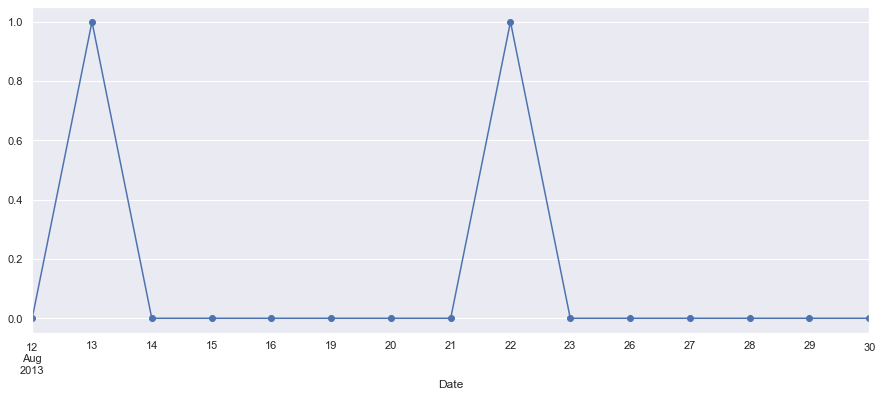

In [81]:
((((x1 > x2) * 1).diff() > 0) * 1)[0:15].plot(marker='o')

In [82]:
a1 = np.array([1, 1, 2, 3, 5, 8])
np.diff(a1)

array([0, 1, 1, 2, 3])

In [83]:
len(_)

5

In [84]:
s1 = pd.Series(a1)
s1.diff()

0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5    3.0
dtype: float64

In [85]:
len(_)

6

In [95]:
len(dfn['XEF.TO'])

2299

In [86]:
x = ti.cross_over(dfn['XEF.TO'], dfn['ZCN.TO'])
x

array([False,  True, False, ..., False, False, False])

In [87]:
# output is numpy array
type(x)

numpy.ndarray

In [96]:
len(x)

2299

In [88]:
x1.index

DatetimeIndex(['2013-08-12', '2013-08-13', '2013-08-14', '2013-08-15',
               '2013-08-16', '2013-08-19', '2013-08-20', '2013-08-21',
               '2013-08-22', '2013-08-23',
               ...
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07'],
              dtype='datetime64[ns]', name='Date', length=2299, freq=None)

<AxesSubplot:xlabel='Date'>

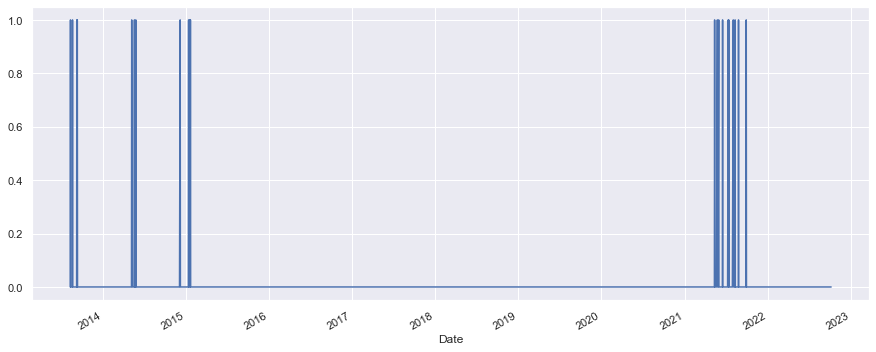

In [97]:
# Can create a new series from original index
pd.Series(x * 1, index=x1.index).plot()